In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [19]:
vaccine_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
vaccine_data.tail(20)

iso_code continent  location        date  total_cases  new_cases  \
63170      ZWE    Africa  Zimbabwe  2021-01-11      22297.0      820.0   
63171      ZWE    Africa  Zimbabwe  2021-01-12      23239.0      942.0   
63172      ZWE    Africa  Zimbabwe  2021-01-13      24256.0     1017.0   
63173      ZWE    Africa  Zimbabwe  2021-01-14      25368.0     1112.0   
63174      ZWE    Africa  Zimbabwe  2021-01-15      26109.0      741.0   
63175      ZWE    Africa  Zimbabwe  2021-01-16      26881.0      772.0   
63176      ZWE    Africa  Zimbabwe  2021-01-17      27203.0      322.0   
63177      ZWE    Africa  Zimbabwe  2021-01-18      27892.0      689.0   
63178      ZWE    Africa  Zimbabwe  2021-01-19      28675.0      783.0   
63179      ZWE    Africa  Zimbabwe  2021-01-20      29408.0      733.0   
63180      ZWE    Africa  Zimbabwe  2021-01-21      30047.0      639.0   
63181      ZWE    Africa  Zimbabwe  2021-01-22      30523.0      476.0   
63182      ZWE    Africa  Zimbabwe  2021-01-23      31007.0      484.0   
63183      ZWE    Africa  Zimbabwe  2021-01-24      31320.0      313.0   
63184      ZWE    Africa  Zimbabwe  2021-01-25      31646.0      326.0   
63185      ZWE    Africa  Zimbabwe  2021-01-26      32004.0      358.0   
63186      ZWE    Africa  Zimbabwe  2021-01-27      32304.0      300.0   
63187      ZWE    Africa  Zimbabwe  2021-01-28      32646.0      342.0   
63188      ZWE    Africa  Zimbabwe  2021-01-29      32952.0      306.0   
63189      ZWE    Africa  Zimbabwe  2021-01-30      33273.0      321.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
63170             924.000         528.0        21.0               20.571  ...   
63171             863.571         551.0        23.0               19.000  ...   
63172             921.714         589.0        38.0               22.571  ...   
63173             956.143         636.0        47.0               27.143  ...   
63174             921.286         666.0        30.0               28.286  ...   
63175             911.714         683.0        17.0               28.571  ...   
63176             818.000         713.0        30.0               29.429  ...   
63177             799.286         773.0        60.0               35.000  ...   
63178             776.571         825.0        52.0               39.143  ...   
63179             736.000         879.0        54.0               41.429  ...   
63180             668.429         917.0        38.0               40.143  ...   
63181             630.571         962.0        45.0               42.286  ...   
63182             589.429         974.0        12.0               41.571  ...   
63183             588.143        1005.0        31.0               41.714  ...   
63184             536.286        1075.0        70.0               43.143  ...   
63185             475.571        1103.0        28.0               39.714  ...   
63186             413.714        1122.0        19.0               34.714  ...   
63187             371.286        1160.0        38.0               34.714  ...   
63188             347.000        1178.0        18.0               30.857  ...   
63189             323.714        1193.0        15.0               31.286  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
63170        1899.775             21.4                307.846   
63171        1899.775             21.4                307.846   
63172        1899.775             21.4                307.846   
63173        1899.775             21.4                307.846   
63174        1899.775             21.4                307.846   
63175        1899.775             21.4                307.846   
63176        1899.775             21.4                307.846   
63177        1899.775             21.4                307.846   
63178        1899.775             21.4                307.846   
63179        1899.775             21.4                307.846   
63180        1899.775             

In [20]:
#vaccine_data['positive_rate'].unique()

In [21]:
#[(col,vaccine_data[col].isnull().sum()) for 
 #col in vaccine_data.columns if vaccine_data[col].isnull().any()]
vaccine_data.drop('iso_code', axis=1, inplace=True)

In [22]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63190 entries, 0 to 63189
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              62456 non-null  object 
 1   location                               63190 non-null  object 
 2   date                                   63190 non-null  object 
 3   total_cases                            62596 non-null  float64
 4   new_cases                              62588 non-null  float64
 5   new_cases_smoothed                     61629 non-null  float64
 6   total_deaths                           53994 non-null  float64
 7   new_deaths                             53992 non-null  float64
 8   new_deaths_smoothed                    61629 non-null  float64
 9   total_cases_per_million                62237 non-null  float64
 10  new_cases_per_million                  62229 non-null  float64
 11  ne

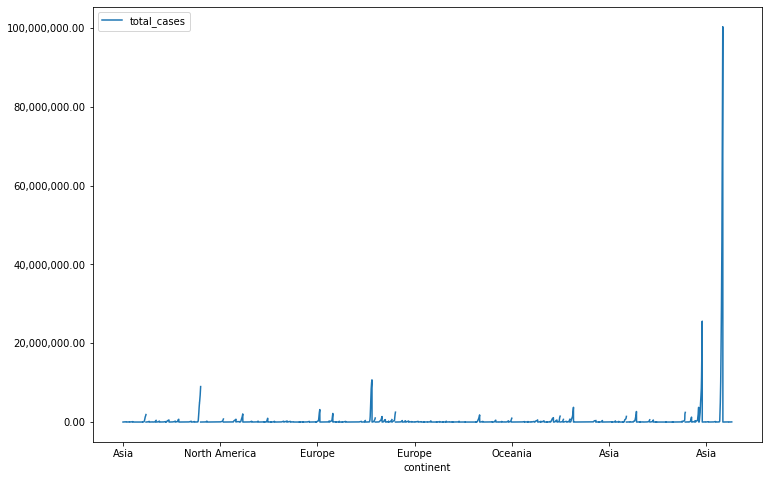

In [4]:
ax = vaccine_data.plot(x= 'continent', y = 'total_cases', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

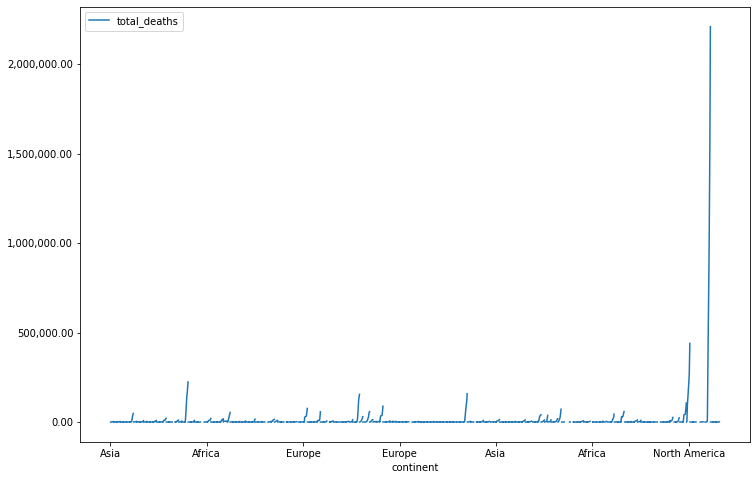

In [23]:
ax = vaccine_data.plot(x= 'continent', y = 'total_deaths', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

In [24]:
vaccine_data['continent'].value_counts()

Africa           17329
Europe           15865
Asia             15863
North America     7606
South America     4028
Oceania           1765
Name: continent, dtype: int64

In [33]:
#vaccine_data.plot(kind='bar',x='date',y='total_vaccinations_per_hundred',title='Date vs total_vaccinations_per_hundred')

In [ ]:
#.plot(kind='bar',x='country',y='people_vaccinated',title='People vaccinated per Country')

In [35]:
fig=px.choropleth(data_frame= vaccine_data,
                          locations=  vaccine_data['location'],
                          locationmode='country names',
                          color= vaccine_data['total_vaccinations_per_hundred'],
                          animation_frame= vaccine_data['date'],
                          animation_group= vaccine_data['total_vaccinations_per_hundred'])
fig.update_layout(dict1={'title':'Total Vaccinations per hundred'})
fig.show() 

In [37]:
vaccine_data['death_rate'] = (vaccine_data['new_deaths_smoothed_per_million'] / vaccine_data['new_cases_smoothed_per_million']).replace(np.inf,np.nan)
vaccine_data['population_coverage'] = vaccine_data['total_tests'] / vaccine_data['population']
vaccine_data['datetime'] = pd.to_datetime(vaccine_data['date'])

In [38]:
trace1 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_tests_smoothed'].sum().astype(int),
        xaxis='x2',
    yaxis='y2',
    name = "new tests smoothed"
)
trace2 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_deaths_smoothed'].sum().astype(int),
    name = "new deaths smoothed"
)
trace3 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=(vaccine_data.groupby(['date'])['reproduction_rate'].mean() * 100).round(3),
    xaxis='x3',
    yaxis='y3',
    name = "test reproduction ratee %"
)
trace4 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_cases_smoothed'].sum().astype(int),
    xaxis='x4',
    yaxis='y4',
    name = "new cases smoothed"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'New tests, deaths, cases and test positive rate'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)